<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 4

## Q1:Discrete FFT and Power Spectrum

In [53]:
import numpy as np
import scipy as sc
import math as m
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pylab as P
import scipy.stats as stats
%matplotlib inline

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc=hourdata[0,:]
jb=hourdata[1,:]
dc =dc[~np.isnan(dc)]
jb =jb[~np.isnan(jb)]

**1** Using the data from the hourly time series at Deep Cove (`dc`), show that the canned `fft` routine returns the correct discrete Fourier Transform of a suitable subset of the data (your choice on what subset).  You can do this graphically, by comparing the amplitude and the phase of the Fourier components, or simply show that the resulting numbers are the same.  

Some Hints: 
  - ignore bad data (rather than dealing with it "properly").  Make sure the units of your FT are: $\mathrm{^oC\, s}$.
  - If you want to compute the DFT efficiently, form the matrix $F$ referred to in the notes, and plot some of the time series associated with the different entries and make sure they look like Sines and Cosines and that the edge conditions are what you want.  Alternately, you can use your dft routine from the last assignment, and chose your frequencies properly.


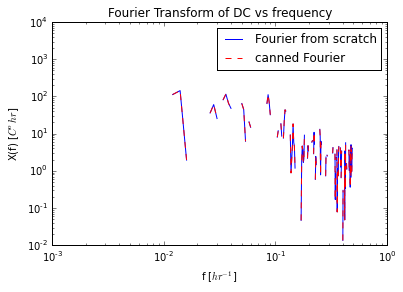

In [75]:
def dft(x):
    t = np.arange(0, x.size, 1)
    T = x.size
    f = np.arange(0., 1./2., (1./T))
    Xf = np.zeros((f.size, t.size))
    for i, ff in enumerate(f):
        for k, tt in enumerate(t):
            Xf[i][k] = np.sum(x*np.exp(-1j*2.*m.pi*ff*tt))
    Sxx = (1./T)*np.dot(Xf,np.transpose(np.conjugate(Xf)))
    return f,Xf,Sxx

def dftj(x):
    bigT = x.size
    f = np.arange(0., 0.5, (1./bigT))
    t = np.arange(0,len(x))
    T,F=np.meshgrid(t,f)
    # make the fourier matrices
    E = np.exp(-1j*2*np.pi*T*F)
    X = np.dot(E,x)
    Sxx = X*np.conjugate(X)/bigT
    return f, X, Sxx

def fft(x):
    T = x.size
    XfC = np.fft.fft(x)
    fC = np.fft.fftfreq(x.size, 1)
    Sxx = XfC*np.conjugate(XfC)/T
    return fC, XfC, Sxx


dcsub = dc[0:500]
Dj = dftj(dcsub)
F = fft(dcsub)

plt.loglog(Dj[0], Dj[1], label='Fourier from scratch')
plt.loglog(F[0], F[1], 'r--', label='canned Fourier')
plt.xlabel(r'f [$ hr^{-1}$]')
plt.ylabel('X(f) [$ C^o hr$]')
plt.title('Fourier Transform of DC vs frequency')
plt.legend(loc=1)

The Fourier transforms from each method canned routine versus other method, give the same result.

**2** Now, we can go ahead and use `np.fft.fft`.  Estimate the power spectrum for the Deep Cove time series (again go ahead and skip over gaps, though some of the bigs ones will screw up your frequencies a bit)

  - Use *all* the data.  
  - Report your results in proper SI units.
  - Indicate on your plot at least a couple of important frequencies

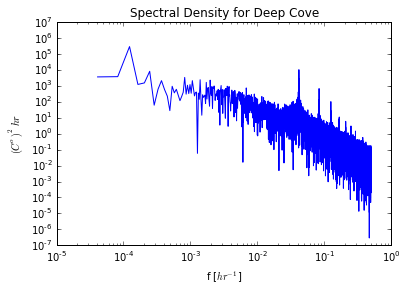

In [77]:
DC = fft(dc)
plt.loglog(DC[0], DC[2])
plt.xlabel('f [$hr^{-1}$]')
plt.title('Spectral Density for Deep Cove')
plt.ylabel(r'$(C^o)^2 hr$')

Very low frequency peaks at are now plotted which weren't observable on the shorter time scale spectral density. In [$hr^{-1}$] a yearly frequency is $\frac{1}{24*365 hr}$ = 0.0001141 $hr^{-1}$. in the graph a peak is clear just above $10^{-4}$ the next most prominent peak occurs around 0.04 $hr^{-1}$. This corresponds to the daily frequency $\frac{1}{24 hr}$ = 0.04167 $ hr^{-1}$

**3** Demonstrate Parceval's Theorem applies to your spectral estimate.  i.e. show that 

\begin{equation}
  \sigma_x^2=\int_0^{\infty} G_{xx}(f)\ \mathrm{d}f
\end{equation}

applies to your estimate of $G_{xx}(f)$.

In [11]:
Gxx = 2*DC[2]
bigT = dc.size

sigG = np.sum(Gxx)/(2*bigT)
sig = np.var(dc)

print sigG
print sig

(143.706555172+0j)
36.8172572917


## Q2: Emperically derive distribution of spectral estimate

**1** Write a short function to create a "red" time series by taking the cumulative sum of Normally distributed random data, and plot one realization.  The number of data points $N$ can be relatively small (say 1000).

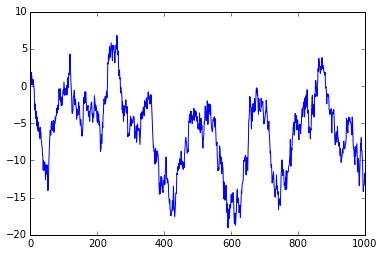

In [19]:
def rednoise(N):
    r = np.random.randn(N)
    red = r*0.
    t = np.arange(0, 1000, 1)
    for i in range(0, N, 1):
        if(i>0):
            red[i] = red[i-1] + r[i]
        else:
            red[i] = r[i]
    return red

t = np.arange(0, 1000, 1)
plt.plot(t, rednoise(1000))

**2** Write a second function to return the estimate of the power spectrum of $x$.  For posterity sake, include a value of the sampling frequency, and return the proper frequencies for the estimate.  Plot the resulting spectrum.

1000


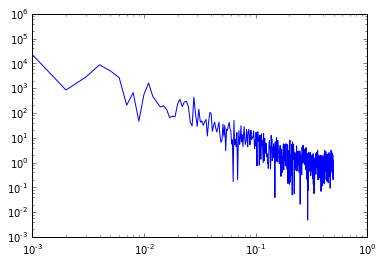

In [25]:
red = rednoise(1000)
RED = fft(red)
plt.loglog(RED[0],RED[2])
print RED[0].size

**3** Now do the Monte-Carlo, by running the above 100 times and plotting the resulting spectral estimates as dots on the same plot. As you are making your data, save it into an array.  I did something like:
```python
    Gxs = zeros((1000,501))
    # inside my loop:
        Gxs[ind,:]=Gxx   
```

(100L, 1000L)


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: ComplexWarning: Casting complex values to real discards the imaginary part


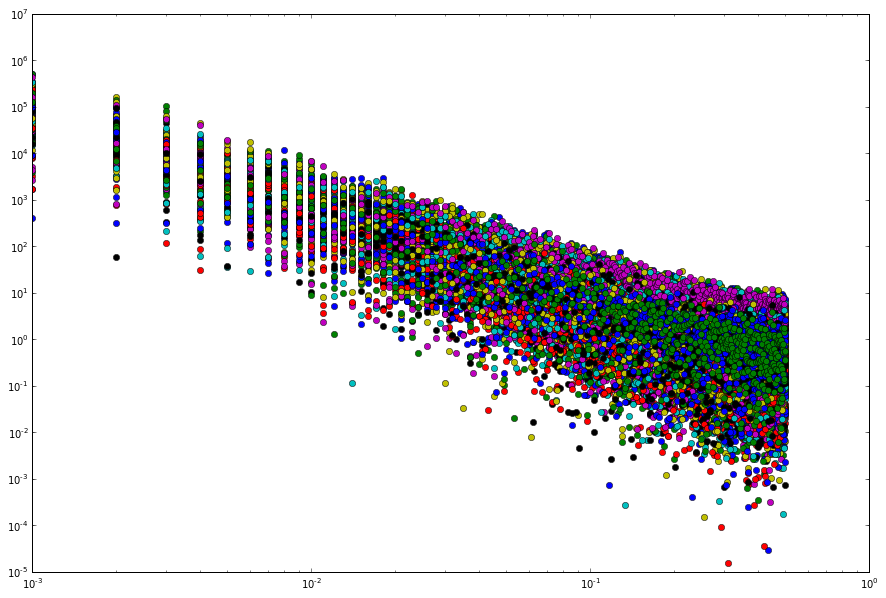

In [33]:
fig = plt.figure(figsize=(15,10))
Gxx = np.zeros((100,1000))
for h in range(0, 100, 1):
    x=rednoise(N)
    REDNOISE = fft(x)
    Gxx[h] = 2*REDNOISE[2]
    plt.loglog(REDNOISE[0], 2*REDNOISE[2], 'o')

**4** Now, on the same plot, add the mean of all your $G_{xx}(f)$ estimates (as a function of $f$), and the upper and lower bounds encompasing 95% of the data. (Hint, sort each column of your matrix - `np.sort` - and plot the value at $0.025 N$ and $0.975 N$).

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part


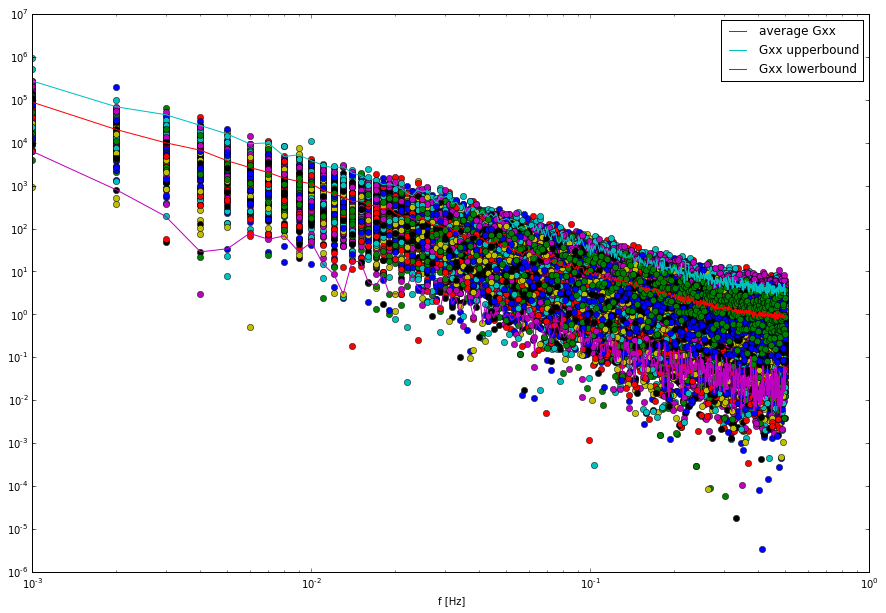

In [67]:
fig = plt.figure(figsize=(15,10))
Gxx = np.zeros((100,1000))
for h in range(0, 100, 1):
    x=rednoise(N)
    REDNOISE = fft(x)
    Gxx[h] = 2*REDNOISE[2]
    plt.loglog(REDNOISE[0], 2*REDNOISE[2], 'o')
f = REDNOISE[0]
Gxxs = np.sort(Gxx, axis=0)    
Gxxt = np.transpose(Gxxs)

avGxx = f*0.
nineGxx = Gxxs[97]
twoGxx = Gxxs[2]

for h in range(0, 1000, 1):
    avGxx[h] = np.mean(Gxxt[h])
plt.loglog(f, avGxx, label='average Gxx')
plt.loglog(f, nineGxx, label='Gxx upperbound')
plt.loglog(f, twoGxx, label='Gxx lowerbound')
plt.xlabel('f [Hz]')
plt.legend(loc=1)

yep, the graphs there, looks ok.

**5** Show that the ratio of the lower and upper bounds of your spectral estimates spread compares favourably with the ratio between the lower and upper 95% confidence bounds of the  $\chi^2_2$ distribution.  Comment on any difference.

145.702955659
476.105066005


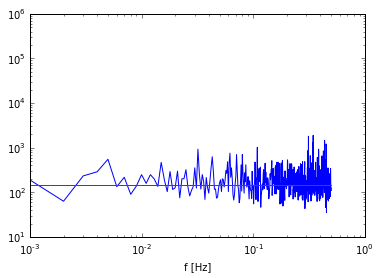

In [65]:

Rred = f*0.
for h in range(0, 1000, 1):
    Rred[h] = nineGxx[h]/twoGxx[h]
chisqr = stats.chi2.interval(0.95, df=2)
fig,ax = plt.subplots()
ax.loglog(f, Rred)
Rchi = f*0.
Rchi.fill(chisqr[1]/chisqr[0])
ax.loglog(f, Rchi)
ax.set_xlabel('f [Hz]')
print np.mean(Rchi)
print np.mean(Rred)

The ratio of $ \chi^2 $ upper bounds is on the same order as the ratio of the bounds for the red noise spectral density. Overall the Red noise spectral boundary ratio is ~3times larger than that of $\chi^2$